**Aplicação dos algoritmos de aprendizagem de máquina na predição de espessuras e localização de incrustações**

**Importando as bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils

In [2]:
df = pd.read_csv('dadoraiz.csv')

In [3]:
df.head()

,Tipo,INC,D1-670,D2-20,D2-30,D2-40,D2-50,D2-60,D2-70,D2-80,...,D3-580,D3-590,D3-600,D3-610,D3-620,D3-630,D3-640,D3-650,D3-660,D3-670
0,0,0.50,0.000215,1.436200e-08,1.686700e-08,1.786900e-08,1.703400e-08,1.803600e-08,1.670000e-08,1.920500e-08,...,0,0,0,0,0,0,0,0,0,0
1,0,0.51,0.000214,1.402800e-08,1.686700e-08,1.786900e-08,1.703400e-08,1.803600e-08,1.653300e-08,1.920500e-08,...,0,0,0,0,0,0,0,0,0,0
2,0,0.52,0.000214,1.369400e-08,1.670000e-08,1.770200e-08,1.703400e-08,1.786900e-08,1.686700e-08,1.870400e-08,...,0,0,0,0,0,0,0,0,0,0
3,0,0.53,0.000213,1.369400e-08,1.636600e-08,1.770200e-08,1.670000e-08,1.720100e-08,1.736800e-08,1.837000e-08,...,0,0,0,0,0,0,0,0,0,0
4,0,0.54,0.000212,1.352700e-08,1.653300e-08,1.753500e-08,1.653300e-08,1.753500e-08,1.670000e-08,1.803600e-08,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5204 entries, 0 to 5203
Columns: 135 entries, Tipo to D3-670
dtypes: float64(114), int64(21)
memory usage: 5.4 MB


In [5]:
df.describe()

,Tipo,INC,D1-670,D2-20,D2-30,D2-40,D2-50,D2-60,D2-70,D2-80,...,D3-580,D3-590,D3-600,D3-610,D3-620,D3-630,D3-640,D3-650,D3-660,D3-670
count,5204.000000,5204.000000,5204.000000,5.204000e+03,5.204000e+03,5.204000e+03,5.204000e+03,5.204000e+03,5.204000e+03,5.204000e+03,...,5204.0,5204.0,5204.0,5204.0,5204.0,5204.0,5204.0,5204.0,5204.0,5204.0
mean,45.000000,7.000000,0.000014,5.643631e-09,5.447557e-09,5.010995e-09,5.042251e-09,4.938598e-09,4.983236e-09,5.158805e-09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,33.544243,3.756023,0.000030,2.744854e-09,3.036401e-09,2.986770e-09,2.914204e-09,2.868978e-09,2.709792e-09,3.137907e-09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.500000,0.000001,1.670000e-09,8.350000e-10,2.004000e-09,1.670000e-09,2.004000e-09,1.670000e-09,1.670000e-09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,22.500000,3.750000,0.000001,3.841000e-09,3.173000e-09,3.006000e-09,3.173000e-09,2.839000e-09,3.006000e-09,3.006000e-09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,45.000000,7.000000,0.000004,4.342000e-09,4.843000e-09,3.507000e-09,3.674000e-09,3.507000e-09,3.507000e-09,3.340000e-09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,67.500000,10.250000,0.000014,7.014000e-09,6.680000e-09,5.678000e-09,5.678000e-09,6.012000e-09,6.012000e-09,7.014000e-09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,90.000000,13.500000,0.000215,1.536400e-08,1.686700e-08,1.786900e-08,1.703400e-08,1.820300e-08,1.736800e-08,1.920500e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Visualizando os dados**

In [6]:
import seaborn as sns
%matplotlib inline

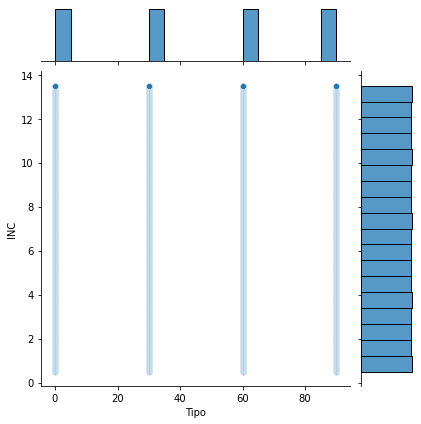

In [7]:
sns.jointplot(x='Tipo',y='INC',data=df)

<AxesSubplot:xlabel='Tipo', ylabel='count'>

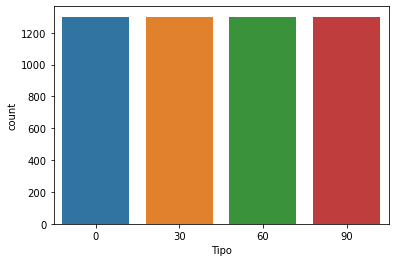

In [8]:
sns.countplot(x='Tipo',data=df)

In [9]:
import matplotlib.pyplot as plt

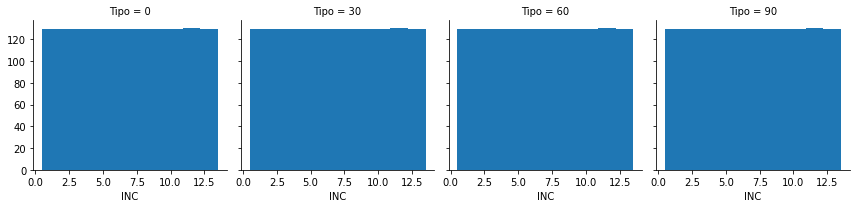

In [10]:
g = sns.FacetGrid(data=df,col='Tipo', palette='rainbow')
g.map(plt.hist,'INC')

**Dividindo as colunas em dados previsores e alvo**

In [11]:
x = df.iloc[:, 2:135].values
y = df.iloc[:, [0,1]].values

In [12]:
x_df = pd.DataFrame(x)
y_df = pd.DataFrame(y)

In [13]:
x_df.head()

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
0,0.000215,1.436200e-08,1.686700e-08,1.786900e-08,1.703400e-08,1.803600e-08,1.670000e-08,1.920500e-08,2.171000e-08,2.588500e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000214,1.402800e-08,1.686700e-08,1.786900e-08,1.703400e-08,1.803600e-08,1.653300e-08,1.920500e-08,2.171000e-08,2.505000e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000214,1.369400e-08,1.670000e-08,1.770200e-08,1.703400e-08,1.786900e-08,1.686700e-08,1.870400e-08,2.137600e-08,2.555100e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000213,1.369400e-08,1.636600e-08,1.770200e-08,1.670000e-08,1.720100e-08,1.736800e-08,1.837000e-08,2.154300e-08,2.521700e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000212,1.352700e-08,1.653300e-08,1.753500e-08,1.653300e-08,1.753500e-08,1.670000e-08,1.803600e-08,2.087500e-08,2.538400e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5204 entries, 0 to 5203
Columns: 133 entries, 0 to 132
dtypes: float64(133)
memory usage: 5.3 MB


In [15]:
y_df

,0,1
0,0.0,0.50
1,0.0,0.51
2,0.0,0.52
3,0.0,0.53
4,0.0,0.54
...,...,...
5199,90.0,13.46
5200,90.0,13.47
5201,90.0,13.48
5202,90.0,13.49


<AxesSubplot:ylabel='count'>

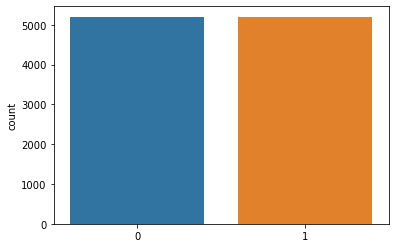

In [16]:
sns.countplot(data=y_df)

**Normalizando as variáveis previsoras: x_feat**

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
scaler.fit(x_df)

MinMaxScaler()

In [20]:
scaled_features = scaler.transform(x_df)

In [21]:
x_feat = pd.DataFrame(scaled_features)
x_feat.head()

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
0,1.000000,0.926829,1.000000,1.000000,1.000000,0.989691,0.957447,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.995868,0.902439,1.000000,1.000000,1.000000,0.989691,0.946809,1.000000,1.000000,0.963768,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.991863,0.878049,0.989583,0.989474,1.000000,0.979381,0.968085,0.971429,0.982906,0.985507,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.987783,0.878049,0.968750,0.989474,0.978261,0.938144,1.000000,0.952381,0.991453,0.971014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.983744,0.865854,0.979167,0.978947,0.967391,0.958763,0.957447,0.933333,0.957265,0.978261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Transformando atributos categóricos em tipo dummy do alvo: y_df**

In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [23]:
from sklearn.compose import ColumnTransformer

In [24]:
labelenconder = LabelEncoder()

In [25]:
y_df[0]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
5199    90.0
5200    90.0
5201    90.0
5202    90.0
5203    90.0
Name: 0, Length: 5204, dtype: float64

In [26]:
y_num = labelenconder.fit_transform(y_df[0])

In [27]:
y_num

array([0, 0, 0, ..., 3, 3, 3], dtype=int64)

In [28]:
onehotencoder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [0])],
                                  remainder='passthrough')

In [29]:
y_dummy = onehotencoder.fit_transform(y)

In [30]:
y_dummy

array([[ 1.  ,  0.  ,  0.  ,  0.  ,  0.5 ],
       [ 1.  ,  0.  ,  0.  ,  0.  ,  0.51],
       [ 1.  ,  0.  ,  0.  ,  0.  ,  0.52],
       ...,
       [ 0.  ,  0.  ,  0.  ,  1.  , 13.48],
       [ 0.  ,  0.  ,  0.  ,  1.  , 13.49],
       [ 0.  ,  0.  ,  0.  ,  1.  , 13.5 ]])

In [31]:
y_feat = pd.DataFrame(y_dummy)

In [ ]:
y_feat.head()

In [ ]:
y_feat.describe()

In [ ]:
X = x_feat
y= y_feat

## APLICAÇÃO DOS MODELOS DE MACHINE LEARNING

**1 - Regressão Linear**

*_split do treino_*

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1632)

*Criando e treinando o modelo*

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

*Predição do modelo*

In [ ]:
predictions = lm.predict(X_test)

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions)

histograma residual

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot((y_test- predictions),bins=30);

*métricas de avaliação da regressão*

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2:', metrics.r2_score(y_test, predictions))

**2 - Regressão Polinomial - 2° grau**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
carac2 = PolynomialFeatures(degree=2)
X_poli_2 = carac2.fit_transform(X)

In [ ]:
modelo2 = LinearRegression()
modelo2.fit(X_poli_2, y)
Y_poli_2 = modelo2.predict(X_poli_2,)

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y, Y_poli_2)

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot((y-Y_poli_2),bins=100);

In [ ]:
print('MAE:', metrics.mean_absolute_error(y, Y_poli_2))
print('MSE:', metrics.mean_squared_error(y, Y_poli_2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, Y_poli_2)))
print('r2:', metrics.r2_score(y, Y_poli_2))

**3 - K Nearest Neighbors**

*Criando e treinando o modelo*

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor(n_neighbors=2)

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
pred = pd.DataFrame(pred)

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,pred)

*Previsões e avaliações*

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('r2:', metrics.r2_score(y_test, pred))

**4 - Árvores de decisão e florestas aleatórias**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtree = DecisionTreeRegressor()

In [ ]:
dtree.fit(X_train,y_train)

In [ ]:
predicts = dtree.predict(X_test)

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predicts)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predicts))
print('MSE:', metrics.mean_squared_error(y_test, predicts))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicts)))
print('r2:', metrics.r2_score(y_test, predicts))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfc = RandomForestRegressor(n_estimators=600)

In [ ]:
rfc.fit(X_train,y_train)

In [ ]:
predicts2 = rfc.predict(X_test)

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predicts2)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predicts2))
print('MSE:', metrics.mean_squared_error(y_test, predicts2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicts2)))
print('r2:', metrics.r2_score(y_test, predicts2))

**5 - Support Vector Machine (SVM)**

Esse tipo de modelo suporta somente uma dimensão de saída? Pesquisar sobre...

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR(degree=2, C=1000, epsilon=0.1)

In [ ]:
y_train[4]

In [ ]:
model.fit(X_train, y_train[4])

In [ ]:
pred_svr = rfc.predict(X_test)

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,pred_svr)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predicts2))
print('MSE:', metrics.mean_squared_error(y_test, predicts2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicts2)))
print('r2:', metrics.r2_score(y_test, predicts2))